# <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">*Exercise Solutions*</span>

## <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">*Conceptual*</span>

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q1</span>

#### <span style="font-family: 'NewComputerModernMath';">1. Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $ R_1, R_2, \dots $, the cutpoints $ t_1, t_2, \dots $, and so forth.  
   
#### <span style="font-family: 'NewComputerModernMath';">   _Hint: Your result should look something like Figures 8.1 and 8.2._  


![Dataset](e1_8-1.png)
![Dataset](e1_8-2.png)

![Dataset](e_1ans.png)

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q2</span>

#### <span style="font-family: 'NewComputerModernMath';">2. It is mentioned in Section **8.2.3** that boosting using depth-one trees (or _stumps_) leads to an _additive_ model: that is, a model of the form  
   
   $$
   f(X) = \sum_{j=1}^{p} f_j(X_j).
   $$
   
#### <span style="font-family: 'NewComputerModernMath';">   Explain why this is the case. You can begin with **(8.12)** in Algorithm **8.2**.

![Dataset](e2_8-12.png)

<span style="font-family: 'NewComputerModernMath';"> As the name explains itself, boosting method tries to upgrade model by adding a new small model which is trying to give more importance to errors of the previous models. Thus, boosted model will turn into an additive model.

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q3</span>

#### <span style="font-family: 'NewComputerModernMath';">3. Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $ \hat{p}_{m1} $. The _x_-axis should display $ \hat{p}_{m1} $, ranging from 0 to 1, and the _y_-axis should display the value of the Gini index, classification error, and entropy.  
   
#### <span style="font-family: 'NewComputerModernMath';">   _Hint: In a setting with two classes, $ \hat{p}_{m1} = 1 - \hat{p}_{m2} $. You could make this plot by hand, but it will be much easier to make in **R**._
</span>

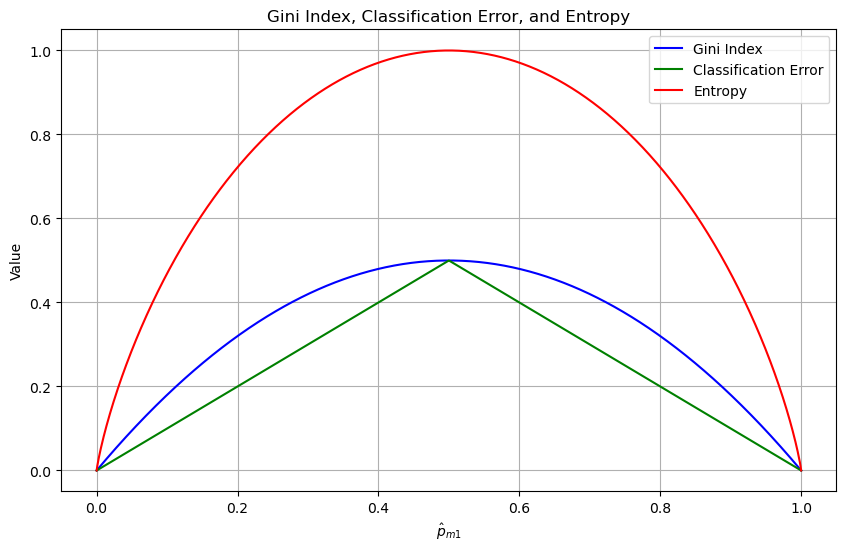

In [464]:
import numpy as np
import matplotlib.pyplot as plt

def gini(p):
    return 1 - (p**2 + (1 - p)**2)

def classification_error(p):
    return 1 - np.maximum(p, 1 - p)

def entropy(p):
    p = np.clip(p, 1e-10, 1 - 1e-10)  # Avoid log(0) by clipping values
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

def plot_metrics(p_values, gini_vals, class_error_vals, entropy_vals):
    plt.figure(figsize=(10, 6))
    plt.plot(p_values, gini_vals, label='Gini Index', color='blue')
    plt.plot(p_values, class_error_vals, label='Classification Error', color='green')
    plt.plot(p_values, entropy_vals, label='Entropy', color='red')
    plt.xlabel('$\hat{p}_{m1}$')
    plt.ylabel('Value')
    plt.title('Gini Index, Classification Error, and Entropy')
    plt.legend()
    plt.grid(True)
    plt.show()

p_m1_values = np.linspace(0, 1, 1000)
gini_values = gini(p_m1_values)
classification_error_values = classification_error(p_m1_values)
entropy_values = entropy(p_m1_values)

plot_metrics(p_m1_values, gini_values, classification_error_values, entropy_values)

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q4</span>

#### <span style="font-family: 'NewComputerModernMath';">4. This question relates to the plots in Figure <b>8.14</b>.

#### <span style="font-family: 'NewComputerModernMath';">(a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure <b>8.14</b>. The numbers inside the boxes indicate the mean of <i>Y</i> within each region.
![Dataset](e4_8-14.png)

![Dataset](ans_4a.png)

#### <span style="font-family: 'NewComputerModernMath';">(b) Create a diagram similar to the left-hand panel of Figure <b>8.14</b>, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.
</span>

![Dataset](ans_4b.png)

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q5</span>

#### <span style="font-family: 'NewComputerModernMath';">5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of <i>X</i>, produce 10 estimates of <i>P</i>(Class is Red | <i>X</i>):

#### <span style="font-family: 'NewComputerModernMath';"> <p style="text-align: center;"> 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.</p>

#### <span style="font-family: 'NewComputerModernMath';">There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?
</span>


##### <span style="font-family: 'NewComputerModernMath';"> First Approach:

##### <span style="font-family: 'NewComputerModernMath';"> G, G, G, G, R, R, R, R, R, R $rightarrow$ Result is red (4 vs 6).


##### <span style="font-family: 'NewComputerModernMath';"> Second Approach:

##### <span style="font-family: 'NewComputerModernMath';"> 0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75 = 4.5  $rightarrow$ $\frac{4.5}{10} = 0.45$ $\rightarrow$ Result is green.

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q6</span>

#### <span style="font-family: 'NewComputerModernMath';"> Provide a detailed explanation of the algorithm that is used to fit a regression tree.

##### <span style="font-family: 'NewComputerModernMath';"> Details are in the book. Please read 8.1.1

## <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">*Applied*</span>

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q7</span>

#### <span style="font-family: 'NewComputerModernMath';">7. In Section <span style="color: blue;">8.3.3</span>, we applied random forests to the <b>Boston</b> data using  <span style="color: brown;">max_features = 6</span> and using <span style="color: brown;">n_estimators = 100</span> and  <span style="color: brown;">n_estimators = 500</span>. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for <span style="color: brown;">max_features</span> and  <span style="color: brown;">n_estimators</span>. You can model your plot after Figure <span style="color: blue;">8.10</span>. Describe the results obtained.
</span>


In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP import load_data
from ISLP.models import summarize, poly, ModelSpec as MS
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [466]:
Boston = load_data("Boston")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


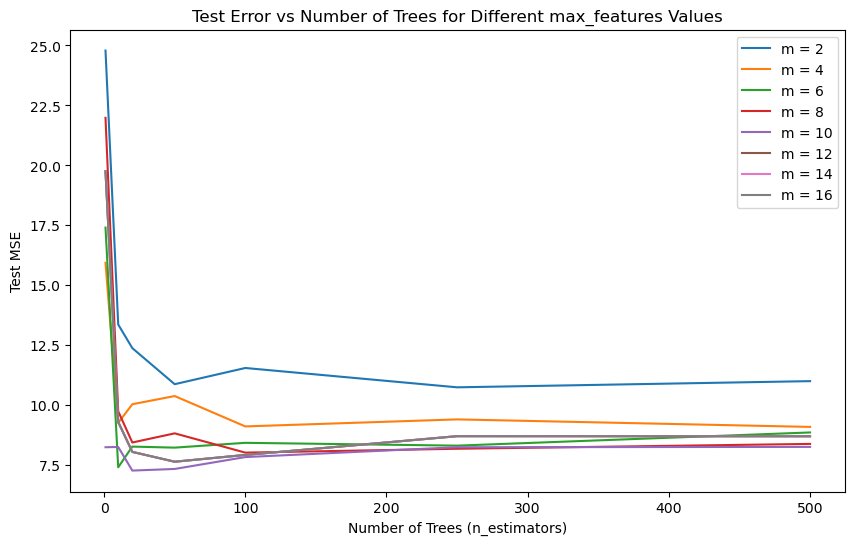

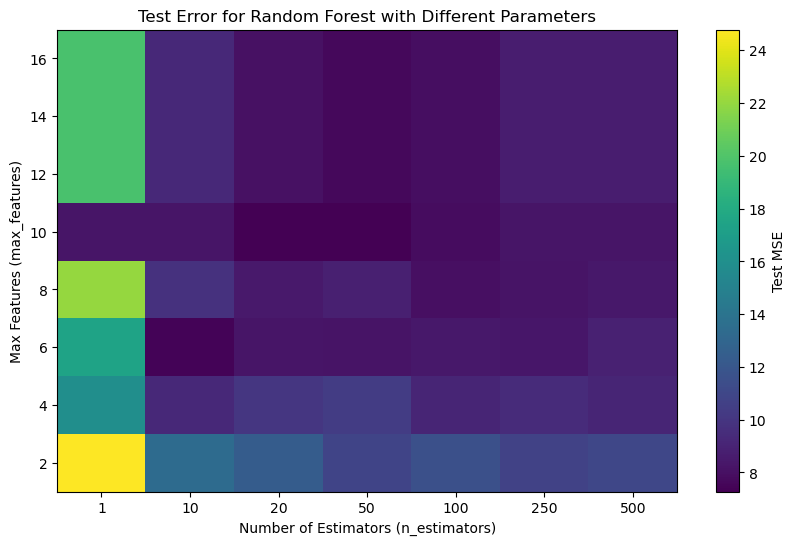

In [467]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = Boston.drop(columns=["medv"])
y = Boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_features_values = [2, 4, 6, 8, 10, 12, 14, 16]
n_estimators_values = [1, 10, 20, 50, 100, 250, 500]
test_errors = np.zeros((len(max_features_values), len(n_estimators_values)))


def train_evaluate_rf(X_train, X_test, y_train, y_test, max_features_values, n_estimators_values):
    test_errors = np.zeros((len(max_features_values), len(n_estimators_values)))
    
    for i, max_features in enumerate(max_features_values):
        for j, n_estimators in enumerate(n_estimators_values):
            rf = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            test_errors[i, j] = mean_squared_error(y_test, y_pred)
    
    return test_errors


test_errors = train_evaluate_rf(X_train, X_test, y_train, y_test, max_features_values, n_estimators_values)

plt.figure(figsize=(10, 6))
for i, max_features in enumerate(max_features_values):
    plt.plot(n_estimators_values, test_errors[i, :], label=f"m = {max_features}")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Test MSE")
plt.title("Test Error vs Number of Trees for Different max_features Values")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(test_errors, cmap="viridis", aspect="auto", origin="lower")
plt.colorbar(label="Test MSE")
plt.xticks(range(len(n_estimators_values)), n_estimators_values)
plt.yticks(range(len(max_features_values)), max_features_values)
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Max Features (max_features)")
plt.title("Test Error for Random Forest with Different Parameters")
plt.show()

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q8</span>

#### <span style="font-family: 'NewComputerModernMath';">8. In the lab, a classification tree was applied to the <span style="color: brown;">Carseats</span> data set after converting <span style="color: brown;">Sales</span> into a qualitative response variable. Now we will seek to predict <span style="color: brown;">Sales</span> using regression trees and related approaches, treating the response as a quantitative variable.

In [468]:
Carseats = load_data("Carseats")

In [469]:
Carseats["ShelveLoc"] = Carseats["ShelveLoc"].map({"Bad": 0, "Medium": 1, "Good": 2})
Carseats["US"] = (Carseats["US"] == "Yes").astype(int)
Carseats["Urban"] = (Carseats["US"] == "Yes").astype(int)

#### <span style="font-family: 'NewComputerModernMath';">(a) Split the data set into a training set and a test set.

In [470]:
X, y = Carseats.drop(columns=["Sales"]), Carseats["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

#### <span style="font-family: 'NewComputerModernMath';">(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [471]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=23)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
mean_squared_error(y_test, y_pred)

5.82978125

#### <span style="font-family: 'NewComputerModernMath';">(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

Optimal Tree Depth: 8


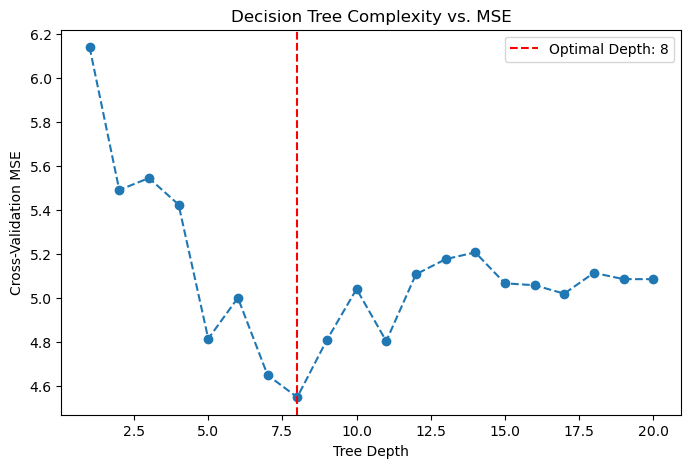

Test MSE (Unpruned Tree): 5.8298
Test MSE (Pruned Tree at depth 8): 4.8652
✅ Pruning improved the test MSE!


In [472]:
# Convert to NumPy arrays if needed
def to_numpy(data):
    return data.to_numpy() if isinstance(data, (pd.DataFrame, pd.Series)) else data

X_train_np, y_train_np = to_numpy(X_train), to_numpy(y_train)
X_test_np, y_test_np = to_numpy(X_test), to_numpy(y_test)

# K-Fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=23)

# Evaluate tree depth performance
max_depth_values = range(1, 21)
mse_scores = [
    -np.mean(cross_val_score(DecisionTreeRegressor(max_depth=depth, random_state=23), 
                             X_train_np, y_train_np, cv=kfold, scoring='neg_mean_squared_error'))
    for depth in max_depth_values
]

# Find optimal tree depth
optimal_depth = max_depth_values[np.argmin(mse_scores)]
print(f"Optimal Tree Depth: {optimal_depth}")

# Plot tree complexity vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, mse_scores, marker='o', linestyle='dashed')
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation MSE")
plt.title("Decision Tree Complexity vs. MSE")
plt.axvline(optimal_depth, color='red', linestyle='--', label=f'Optimal Depth: {optimal_depth}')
plt.legend()
plt.show()

# Function to train and evaluate Decision Tree
def train_evaluate_tree(X_train, y_train, X_test, y_test, max_depth=None):
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=23)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Evaluate unpruned and pruned trees
mse_unpruned = train_evaluate_tree(X_train_np, y_train_np, X_test_np, y_test_np)
mse_pruned = train_evaluate_tree(X_train_np, y_train_np, X_test_np, y_test_np, max_depth=optimal_depth)

print(f"Test MSE (Unpruned Tree): {mse_unpruned:.4f}")
print(f"Test MSE (Pruned Tree at depth {optimal_depth}): {mse_pruned:.4f}")

if mse_pruned < mse_unpruned:
    print("✅ Pruning improved the test MSE!")
else:
    print("⚠️ Pruning did NOT improve the test MSE. The tree may have been underfitting.")

#### <span style="font-family: 'NewComputerModernMath';">(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the <span style="color: brown;">feature_importance_</span> values to determine which variables are most important.

Test MSE (Bagging): 2.3679


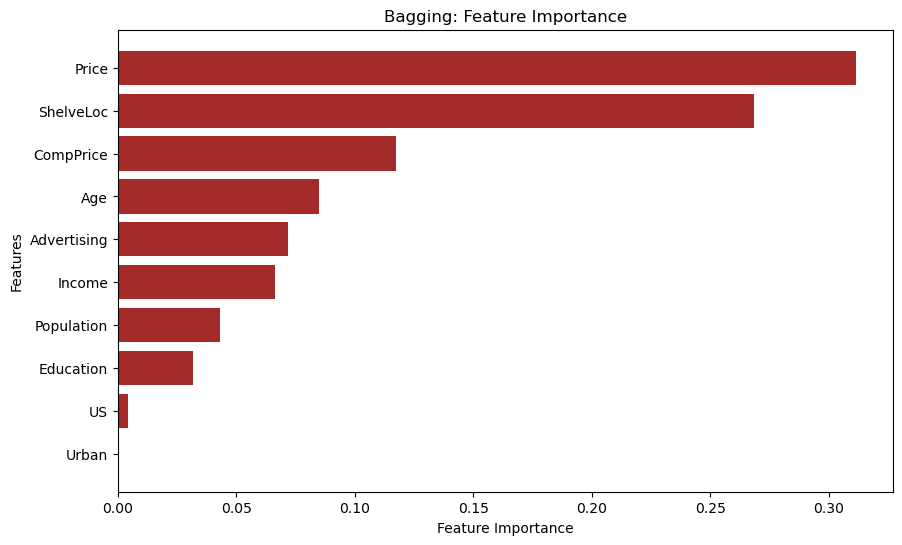

In [473]:
from sklearn.ensemble import BaggingRegressor

# Train Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=23),
    n_estimators=100,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bagging_model.fit(X_train_np, y_train_np)

# Compute Test MSE
y_pred_bagging = bagging_model.predict(X_test_np)
mse_bagging = mean_squared_error(y_test_np, y_pred_bagging)
print(f"Test MSE (Bagging): {mse_bagging:.4f}")

# Compute Feature Importance
def compute_feature_importance(model, feature_names):
    feature_importance = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    return importance_df.sort_values(by="Importance", ascending=False)

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]
feature_importance_df = compute_feature_importance(bagging_model, feature_names)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Bagging: Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(e) Use random forests to analyze this data. What test MSE do you obtain? Use the <span style="color: brown;">feature_importance_</span> values to determine which variables are most important. Describe the effect of <i>m</i>, the number of variables considered at each split, on the error rate obtained.

Test MSE (Random Forest): 2.2508


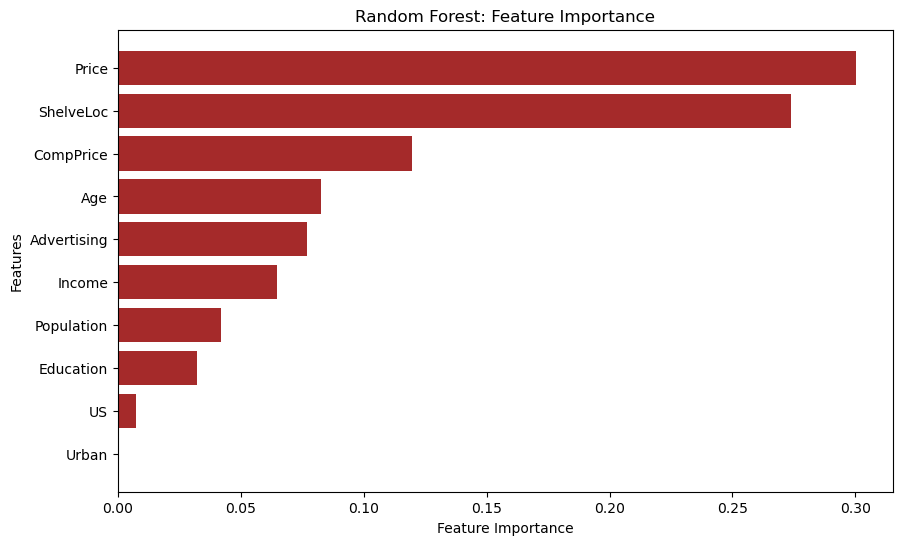

In [474]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    random_state=23,
    n_jobs=-1
)

rf_model.fit(X_train_np, y_train_np)

# Compute Test MSE
y_pred_rf = rf_model.predict(X_test_np)
mse_rf = mean_squared_error(y_test_np, y_pred_rf)
print(f"Test MSE (Random Forest): {mse_rf:.4f}")

# Compute Feature Importance
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]
feature_importance_df = compute_feature_importance(rf_model, feature_names)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest: Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(f) Now analyze the data using BART, and report your results.
</span>

In [475]:
from ISLP.bart import BART

# Train BART Model
bart_model = BART(random_state=0, burnin=5, ndraw=1)
bart_model.fit(X_train_np, y_train_np)

# Compute Test MSE
y_pred_bart = bart_model.predict(X_test_np)
mse_bart = mean_squared_error(y_test_np, y_pred_bart)
print(f"Test MSE (BART): {mse_bart:.4f}")

Test MSE (BART): 1.8489


##### <span style="font-family: 'NewComputerModernMath';"> BART is better than others.

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q9</span>

#### <span style="font-family: 'NewComputerModernMath';">9. This problem involves the <span style="color: brown;">OJ</span> data set which is part of the <span style="color: brown;">ISLP</span> package.

In [476]:
OJ = load_data("OJ")
OJ["Store7"] = (OJ["Store7"] == "Yes").astype(int)
OJ["Purchase"] = (OJ["Purchase"] == "CH").astype(int)

#### <span style="font-family: 'NewComputerModernMath';">(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
</span>

In [477]:
X, y = OJ.drop(columns=["Purchase"]), OJ["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=23)

#### <span style="font-family: 'NewComputerModernMath';">(b) Fit a tree to the training data, with <span style="color: brown;">Purchase</span> as the response and the other variables as predictors. What is the training error rate?
</span>

Test Accuracy (Decision Tree Classifier): 0.8000


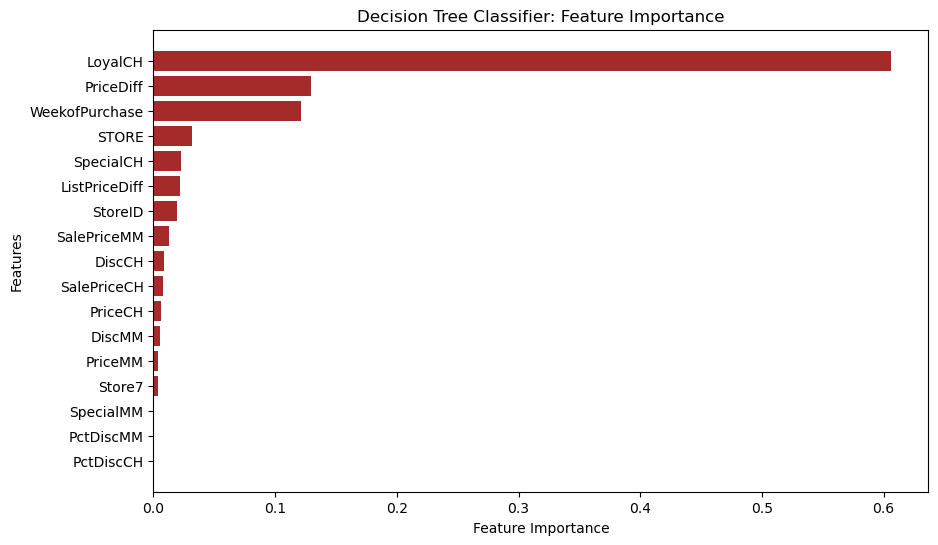

In [478]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dtc_model = DecisionTreeClassifier(random_state=23)
dtc_model.fit(X_train, y_train)

# Compute Test Accuracy
y_pred_dtc = dtc_model.predict(X_test)
accuracy_dtc = np.mean(y_test == y_pred_dtc)
print(f"Test Accuracy (Decision Tree Classifier): {accuracy_dtc:.4f}")

# Compute Feature Importance (corrected for a single tree)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])],
    'Importance': dtc_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Classifier: Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?
</span>

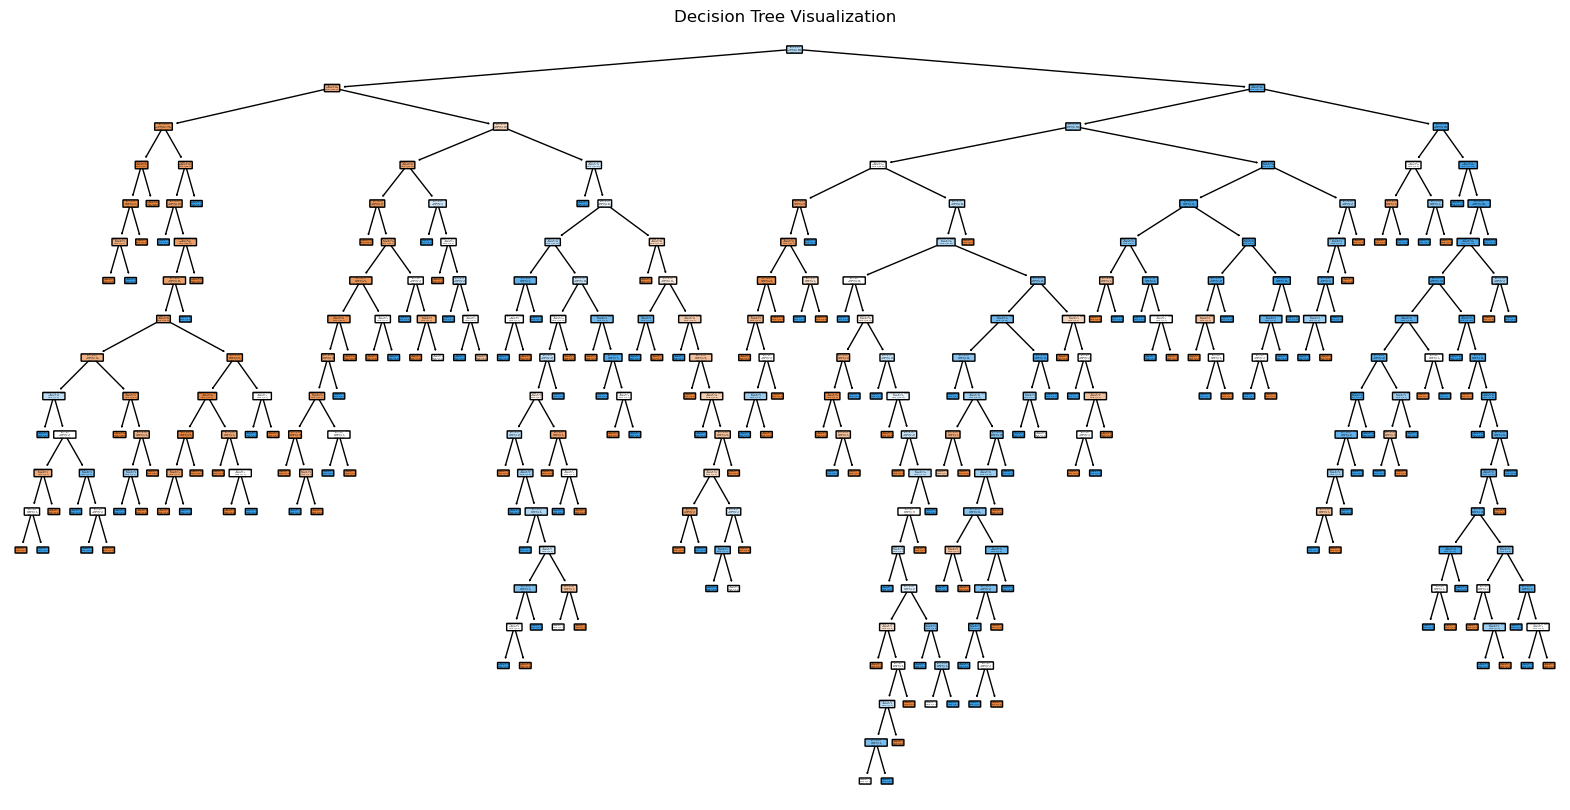

Number of Terminal Nodes (Leaf Nodes): 176


In [479]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtc_model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Count the Number of Terminal Nodes (Leaf Nodes)
print(f"Number of Terminal Nodes (Leaf Nodes): {dtc_model.get_n_leaves()}")

#### <span style="font-family: 'NewComputerModernMath';">(d) Use the <span style="color: brown;">export_tree()</span> function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.
</span>

In [480]:
from sklearn.tree import export_text

tree_text = export_text(dtc_model, feature_names=X_train.columns.tolist())

print(tree_text)

|--- LoyalCH <= 0.48
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- StoreID <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- StoreID >  2.50
|   |   |   |   |--- class: 0
|   |   |--- LoyalCH >  0.04
|   |   |   |--- STORE <= 3.50
|   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoyalCH >  0.04
|   |   |   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |   |   |--- WeekofPurchase <= 265.00
|   |   |   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |   |   |--- WeekofPurchase <= 235.50
|   |   |   |   |   |   |   |   |   |--- WeekofPurchase <= 228.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- WeekofPurchase >  228

#### <span style="font-family: 'NewComputerModernMath';">(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?
</span>

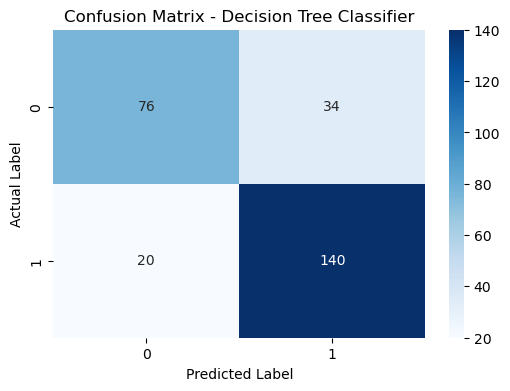

Test Error Rate: 0.2000


In [481]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_pred_dtc = dtc_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_dtc)
test_error_rate = 1 - accuracy_score(y_test, y_pred_dtc)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dtc_model.classes_, yticklabels=dtc_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

print(f"Test Error Rate: {test_error_rate:.4f}")

#### <span style="font-family: 'NewComputerModernMath';">(f) Use cross-validation on the training set in order to determine the optimal tree size.
</span>

#### <span style="font-family: 'NewComputerModernMath';">(g) Produce a plot with tree size on the <i>x</i>-axis and cross-validated classification error rate on the <i>y</i>-axis.
</span>

#### <span style="font-family: 'NewComputerModernMath';">(h) Which tree size corresponds to the lowest cross-validated classification error rate?
</span>

Optimal Tree Depth: 6


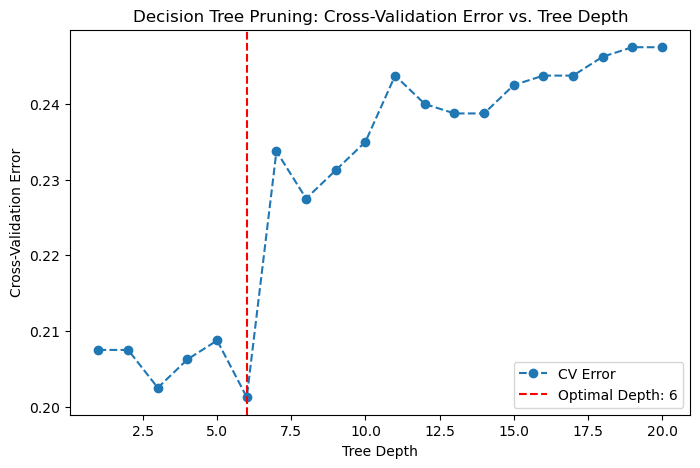

Test Error Rate (Pruned Tree at depth 6): 0.1593


In [482]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

def find_optimal_tree_depth(X_train, y_train, max_depth_values, cv_splits=10):
    kfold = KFold(n_splits=cv_splits, shuffle=True, random_state=23)
    
    cv_errors = [
        1 - np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth, random_state=23), 
                                    X_train, y_train, cv=kfold, scoring='accuracy'))
        for depth in max_depth_values
    ]
    
    optimal_depth = max_depth_values[np.argmin(cv_errors)]
    return optimal_depth, cv_errors

max_depth_values = range(1, 21)
optimal_depth, cv_errors = find_optimal_tree_depth(X_train, y_train, max_depth_values)

print(f"Optimal Tree Depth: {optimal_depth}")

plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, cv_errors, marker='o', linestyle='dashed', label="CV Error")
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Error")
plt.title("Decision Tree Pruning: Cross-Validation Error vs. Tree Depth")
plt.axvline(optimal_depth, color='red', linestyle='--', label=f'Optimal Depth: {optimal_depth}')
plt.legend()
plt.show()

pruned_dtc = DecisionTreeClassifier(max_depth=optimal_depth, random_state=23)
pruned_dtc.fit(X_train, y_train)

y_pred_pruned = pruned_dtc.predict(X_test)
test_error_pruned = 1 - accuracy_score(y_test, y_pred_pruned)

print(f"Test Error Rate (Pruned Tree at depth {optimal_depth}): {test_error_pruned:.4f}")

#### <span style="font-family: 'NewComputerModernMath';">(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.
</span>

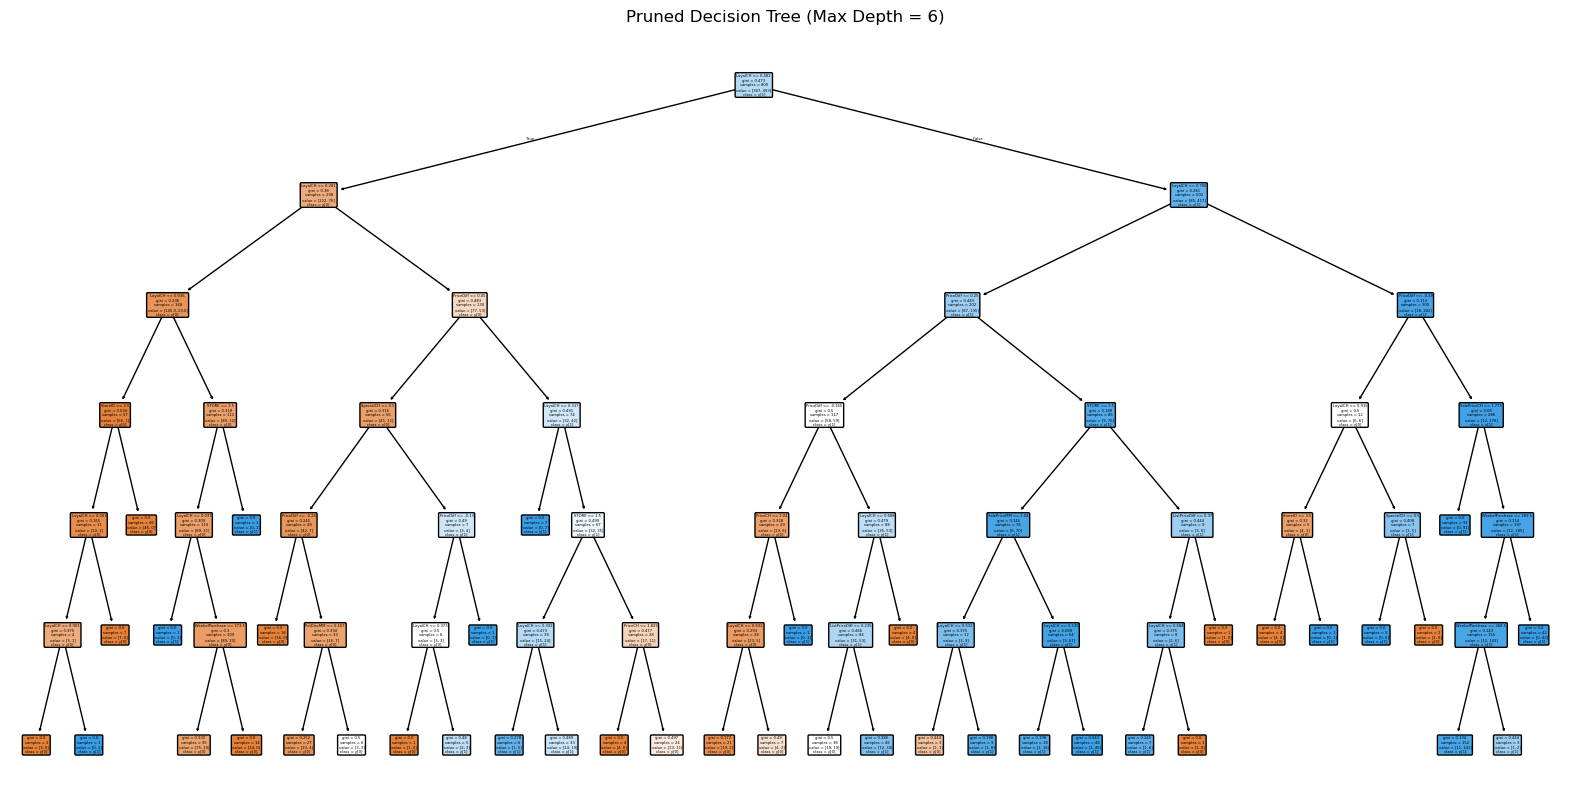

In [483]:
from sklearn.tree import plot_tree

pruned_dtc = DecisionTreeClassifier(max_depth=optimal_depth, random_state=23)
pruned_dtc.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(pruned_dtc, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title("Pruned Decision Tree (Max Depth = "+str(optimal_depth)+")")
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?
</span>

In [484]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

unpruned_dtc = DecisionTreeClassifier(random_state=23)
pruned_dtc = DecisionTreeClassifier(max_depth=optimal_depth, random_state=23)

unpruned_dtc.fit(X_train, y_train)
pruned_dtc.fit(X_train, y_train)

def compute_error_rate(model, X, y):
    return 1 - accuracy_score(y, model.predict(X))

train_error_unpruned = compute_error_rate(unpruned_dtc, X_train, y_train)
train_error_pruned = compute_error_rate(pruned_dtc, X_train, y_train)

print(f"✅ Training Error Rate (Unpruned Tree): {train_error_unpruned:.4f}")
print(f"✅ Training Error Rate (Pruned Tree at Depth 3): {train_error_pruned:.4f}")

if train_error_pruned > train_error_unpruned:
    print("⚠️ Pruned tree has a higher training error rate (expected due to reduced complexity).")
else:
    print("✅ Pruned tree does not significantly increase training error, meaning it's still effective!")

✅ Training Error Rate (Unpruned Tree): 0.0100
✅ Training Error Rate (Pruned Tree at Depth 3): 0.1362
⚠️ Pruned tree has a higher training error rate (expected due to reduced complexity).


#### <span style="font-family: 'NewComputerModernMath';">(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?
</span>

In [485]:
test_error_unpruned = compute_error_rate(unpruned_dtc, X_test, y_test)
test_error_pruned = compute_error_rate(pruned_dtc, X_test, y_test)

print(f"✅ Testing Error Rate (Unpruned Tree): {test_error_unpruned:.4f}")
print(f"✅ Testing Error Rate (Pruned Tree at Depth 3): {test_error_pruned:.4f}")

if test_error_pruned > test_error_unpruned:
    print("⚠️ Pruned tree has a higher testing error rate (expected due to reduced complexity).")
else:
    print("✅ Pruned tree does not significantly increase testing error, meaning it's still effective!")

✅ Testing Error Rate (Unpruned Tree): 0.2000
✅ Testing Error Rate (Pruned Tree at Depth 3): 0.1593
✅ Pruned tree does not significantly increase testing error, meaning it's still effective!


### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q10</span>

#### <span style="font-family: 'NewComputerModernMath';">10. We now use boosting to predict <span style="color: brown;">Salary</span> in the <span style="color: brown;">Hitters</span> data set.
</span>

In [486]:
Hitters = load_data("Hitters")
Hitters["League"] = (Hitters["League"] == "A").astype(int)
Hitters["Division"] = (Hitters["Division"] == "E").astype(int)
Hitters["NewLeague"] = (Hitters["NewLeague"] == "A").astype(int)

#### <span style="font-family: 'NewComputerModernMath';">(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.
</span>

In [487]:
Hitters = Hitters.dropna()

#### <span style="font-family: 'NewComputerModernMath';">(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.
</span>

In [488]:
X, y = Hitters.drop(columns=["Salary"]), Hitters["Salary"]
X_train, y_train, X_test, y_test = X[0:200], y[0:200], X[200:], y[200:]

#### <span style="font-family: 'NewComputerModernMath';">(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter <span style="color: brown;">λ</span>. Produce a plot with different shrinkage values on the <i>x</i>-axis and the corresponding training set MSE on the <i>y</i>-axis.
</span>

#### <span style="font-family: 'NewComputerModernMath';">(d) Produce a plot with different shrinkage values on the <i>x</i>-axis and the corresponding test set MSE on the <i>y</i>-axis.
</span>

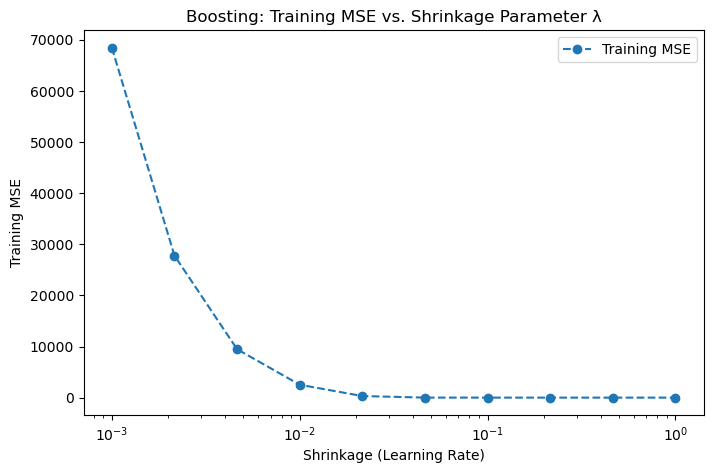

In [489]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def evaluate_shrinkage(X_train, y_train, shrinkage_values, n_estimators=1000):
    train_mse_values = [
        mean_squared_error(y_train, GradientBoostingRegressor(n_estimators=n_estimators, 
                                                              learning_rate=shrinkage, 
                                                              random_state=23).fit(X_train, y_train).predict(X_train))
        for shrinkage in shrinkage_values
    ]
    return train_mse_values

shrinkage_values = np.logspace(-3, 0, 10)
train_mse_values = evaluate_shrinkage(X_train, y_train, shrinkage_values)

# Plot Shrinkage vs. Training MSE
plt.figure(figsize=(8, 5))
plt.plot(shrinkage_values, train_mse_values, marker='o', linestyle='dashed', label="Training MSE")
plt.xscale('log')
plt.xlabel("Shrinkage (Learning Rate)")
plt.ylabel("Training MSE")
plt.title("Boosting: Training MSE vs. Shrinkage Parameter λ")
plt.legend()
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters <span style="color: blue;">3</span> and <span style="color: blue;">6</span>.
</span>

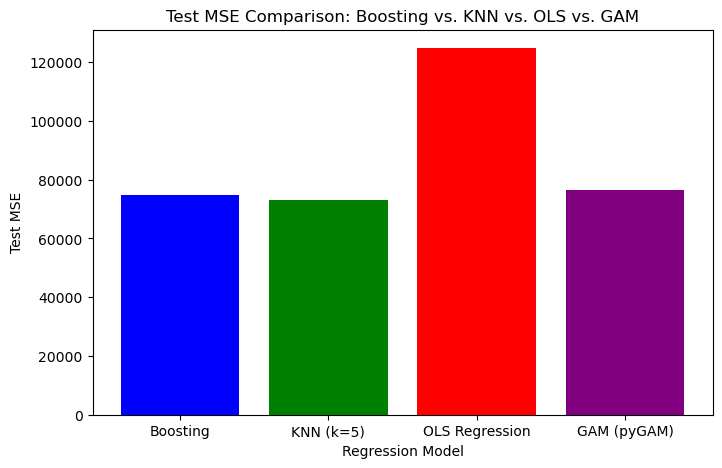

In [490]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from pygam import LinearGAM
from sklearn.metrics import mean_squared_error

# Train and Evaluate Models
def train_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Boosting": GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=23),
        "KNN (k=5)": KNeighborsRegressor(n_neighbors=5),
        "OLS Regression": sm.OLS(y_train, sm.add_constant(X_train)).fit(),
        "GAM (pyGAM)": LinearGAM()
    }

    mse_results = {}

    for name, model in models.items():
        if name == "OLS Regression":
            y_pred = model.predict(sm.add_constant(X_test))
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        mse_results[name] = mean_squared_error(y_test, y_pred)

    return mse_results

mse_results = train_evaluate_models(X_train, y_train, X_test, y_test)

mse_df = pd.DataFrame(mse_results.items(), columns=["Model", "Test MSE"])

plt.figure(figsize=(8, 5))
plt.bar(mse_results.keys(), mse_results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Regression Model")
plt.ylabel("Test MSE")
plt.title("Test MSE Comparison: Boosting vs. KNN vs. OLS vs. GAM")
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(f) Which variables appear to be the most important predictors in the boosted model?
</span>

Test MSE (Boosting Classifier): 74886.6342


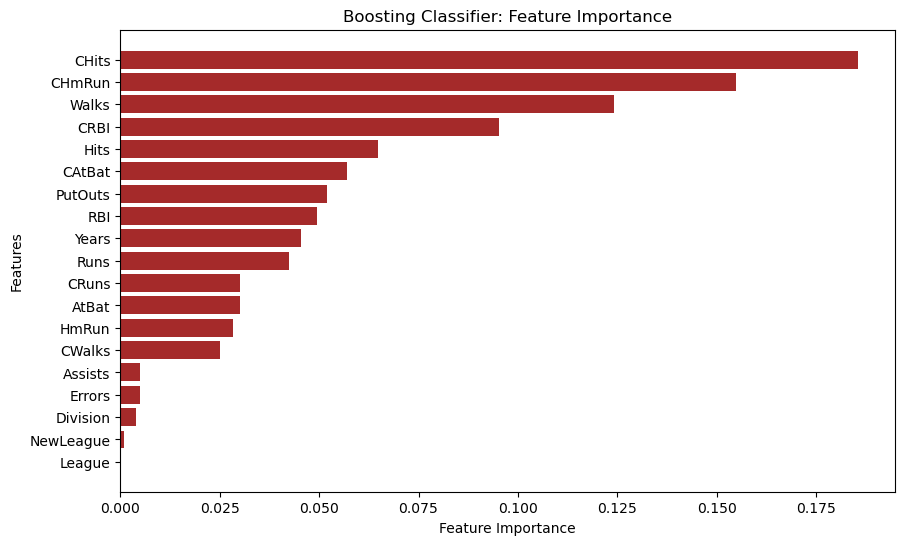

In [491]:
boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=23)
boosting_model.fit(X_train, y_train)
mse_boosting = mean_squared_error(y_test, boosting_model.predict(X_test))
print(f"Test MSE (Boosting Classifier): {mse_boosting:.4f}")

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])],
    'Importance': boosting_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Boosting Classifier: Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(g) Now apply bagging to the training set. What is the test set MSE for this approach?
</span>


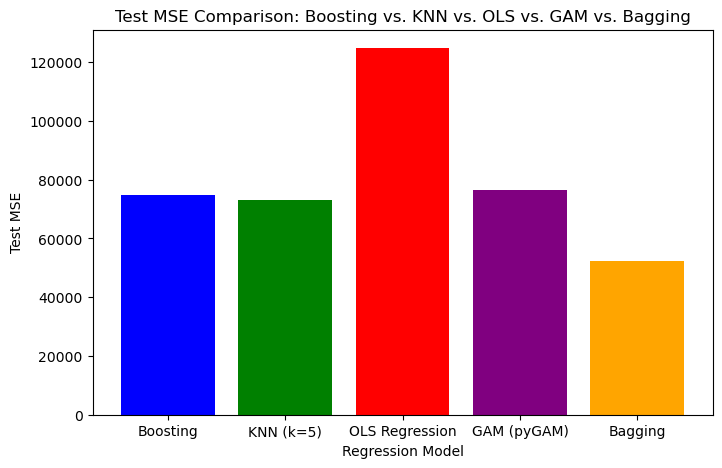

,Model,Test MSE
0,Boosting,74886.634237
1,KNN (k=5),73192.820155
2,OLS Regression,124815.152547
3,GAM (pyGAM),76470.675500
4,Bagging,52364.866055


In [492]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

mse_results["Bagging"] = mean_squared_error(y_test, bagging_model.predict(X_test))

mse_df = pd.DataFrame(mse_results.items(), columns=["Model", "Test MSE"])

plt.figure(figsize=(8, 5))
plt.bar(mse_results.keys(), mse_results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Regression Model")
plt.ylabel("Test MSE")
plt.title("Test MSE Comparison: Boosting vs. KNN vs. OLS vs. GAM vs. Bagging")
plt.show()

display(mse_df)

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q11</span>

#### <span style="font-family: 'NewComputerModernMath';">11. This question uses the <span style="color: brown;"><b>Caravan</b></span> data set.

In [493]:
Caravan = load_data("Caravan")
Caravan["Purchase"] = (Caravan["Purchase"] == "Yes").astype(int)

#### <span style="font-family: 'NewComputerModernMath';"> (a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [494]:
X, y = Caravan.drop(columns=["Purchase"]), Caravan["Purchase"]

X_train, y_train, X_test, y_test = X[:1000], y[:1000], X[1000:], y[1000:]

#### <span style="font-family: 'NewComputerModernMath';">(b) Fit a boosting model to the training set with <span style="color: brown;"><b>Purchase</b></span> as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [495]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=23)
boosting_model.fit(X_train, y_train)

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])],
    'Importance': boosting_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
46,PPERSAUT,0.077050
0,MOSTYPE,0.060969
79,ABRAND,0.058305
8,MGODGE,0.054409
42,MKOOPKLA,0.050364
...,...,...
74,ABROM,0.000000
73,AWERKT,0.000000
70,AVRAAUT,0.000000
52,PWERKT,0.000000


#### <span style="font-family: 'NewComputerModernMath';">(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set? 
</span>

<Figure size 600x600 with 0 Axes>

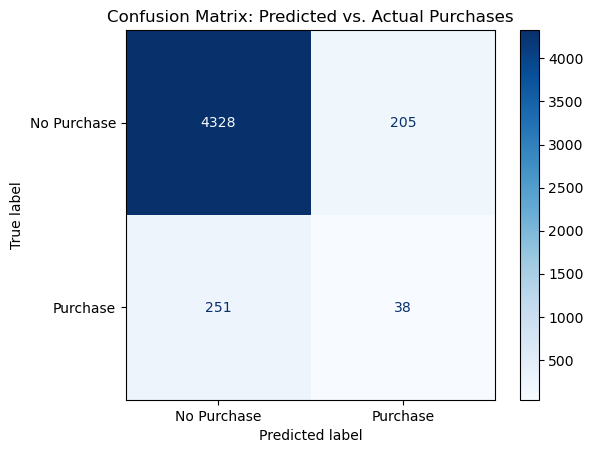

Fraction of predicted purchases that actually made one: 0.16


In [496]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict Probabilities and Classify Purchases (Threshold > 20%)
y_pred_prob = boosting_model.predict_proba(X_test)[:, 1]
y_pred_class = (y_pred_prob > 0.2).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Purchase", "Purchase"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix: Predicted vs. Actual Purchases")
plt.show()

total_predicted_purchases = conf_matrix[1, 1] + conf_matrix[0, 1]
if total_predicted_purchases > 0:
    precision = conf_matrix[1, 1] / total_predicted_purchases
    print(f"Fraction of predicted purchases that actually made one: {precision:.2f}")
else:
    print("No predicted purchases.")

<Figure size 600x600 with 0 Axes>

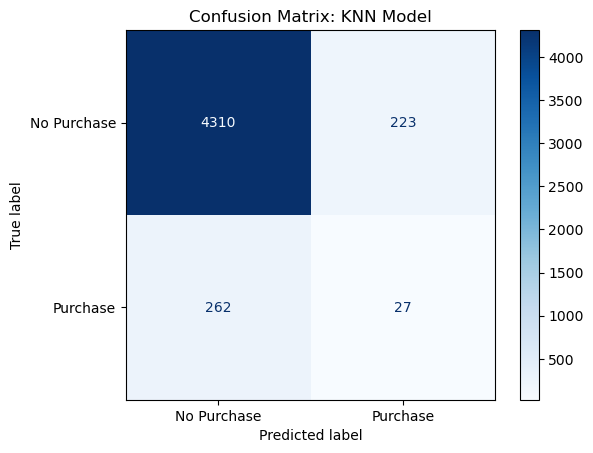

Fraction of predicted purchases that actually made one (KNN Model): 0.11


<Figure size 600x600 with 0 Axes>

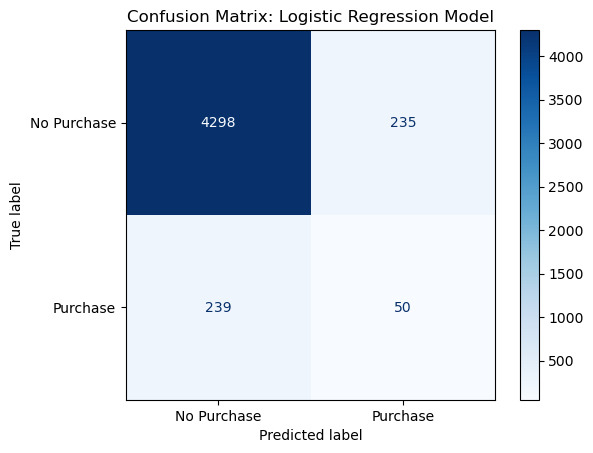

Fraction of predicted purchases that actually made one (Logistic Regression Model): 0.18


<Figure size 600x600 with 0 Axes>

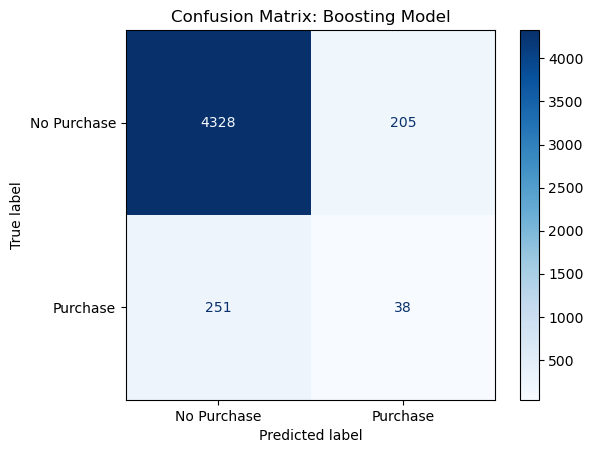

Fraction of predicted purchases that actually made one (Boosting Model): 0.16


In [497]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to train a model and compute confusion matrix
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred_class = (y_pred_prob > 0.2).astype(int)

    conf_matrix = confusion_matrix(y_test, y_pred_class)

    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Purchase", "Purchase"])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    total_predicted_purchases = conf_matrix[1, 1] + conf_matrix[0, 1]
    precision = conf_matrix[1, 1] / total_predicted_purchases if total_predicted_purchases > 0 else 0
    print(f"Fraction of predicted purchases that actually made one ({model_name}): {precision:.2f}")

# Train and evaluate models
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, X_train, y_train, X_test, y_test, "KNN Model")

log_reg_model = LogisticRegression(max_iter=10000)
train_and_evaluate_model(log_reg_model, X_train, y_train, X_test, y_test, "Logistic Regression Model")

train_and_evaluate_model(boosting_model, X_train, y_train, X_test, y_test, "Boosting Model")

### <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">Q12</span>

<span style="font-family: 'NewComputerModernMath';">12. Apply <b>boosting</b>, <b>bagging</b>, <b>random forests</b>, and <b>BART</b> to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like <b>linear</b> or <b>logistic regression</b>? Which of these approaches yields the best performance?
</span>

In [498]:
Credit = load_data("Credit")

In [499]:
from sklearn.preprocessing import OneHotEncoder

# Convert binary categorical variables to numerical format
binary_mapping = {"Yes": 1, "No": 0}
Credit["Gender"] = (Credit["Gender"] == " Male").astype(int)
Credit["Student"] = Credit["Student"].map(binary_mapping)
Credit["Married"] = Credit["Married"].map(binary_mapping)

# One-Hot Encode nominal categorical variables
nominal_cols = ["Ethnicity"]
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Avoid dummy variable trap
encoded_nominal = encoder.fit_transform(Credit[nominal_cols])

# Convert to DataFrame and merge with main DataFrame
encoded_df = pd.DataFrame(encoded_nominal, columns=encoder.get_feature_names_out(nominal_cols))
Credit = Credit.drop(columns=nominal_cols).join(encoded_df)

Credit

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,1,0,1,333,0.0,1.0
1,2,106.025,6645,483,3,82,15,0,1,1,903,1.0,0.0
2,3,104.593,7075,514,4,71,11,1,0,0,580,1.0,0.0
3,4,148.924,9504,681,3,36,11,0,0,0,964,1.0,0.0
4,5,55.882,4897,357,2,68,16,1,0,1,331,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,1,0,1,560,0.0,1.0
396,397,13.364,3838,296,5,65,17,1,0,0,480,0.0,0.0
397,398,57.872,4171,321,5,67,12,0,0,1,138,0.0,1.0
398,399,37.728,2525,192,1,44,13,1,0,1,0,0.0,1.0


In [500]:
X, y = Credit.drop(columns=["Balance"]), Credit["Balance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Test MSE (BART): 14685.4966


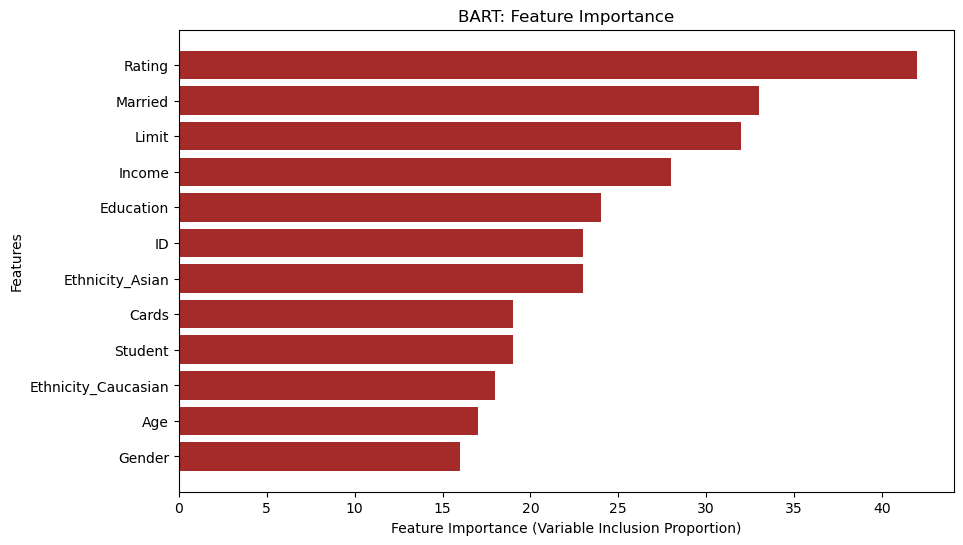

In [501]:
bart_model = BART(random_state=0, burnin=5, ndraw=1)
bart_model.fit(X_train, y_train)

mse_bart = mean_squared_error(y_test, bart_model.predict(X_test))
print(f"Test MSE (BART): {mse_bart:.4f}")

# Compute Feature Importance (Variable Inclusion Proportions)
def extract_feature_importance(model, X_train):
    if hasattr(model, "variable_inclusion_"):
        feature_importance = np.array(model.variable_inclusion_).flatten()
        feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

        if len(feature_importance) != len(feature_names):
            raise ValueError("Mismatch between feature importance and feature names count.")

        return pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by="Importance", ascending=False)
    
    raise AttributeError("BART model does not expose variable importance.")

try:
    feature_importance_df = extract_feature_importance(bart_model, X_train)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
    plt.xlabel("Feature Importance (Variable Inclusion Proportion)")
    plt.ylabel("Features")
    plt.title("BART: Feature Importance")
    plt.gca().invert_yaxis()
    plt.show()

except AttributeError as e:
    print(f"⚠️ Feature importance extraction failed: {e}")

except ValueError as e:
    print(f"⚠️ Feature importance array size mismatch: {e}")

except Exception as e:
    print(f"⚠️ Unexpected error occurred: {e}")

<span style="font-family: 'NewComputerModernMath';"> *Note*: I don’t know much about BART, but I understand that while its feature importance differs from other models, variable inclusion can still indicate which predictors are more influential.

Test MSE (Random Forest): 6999.8875


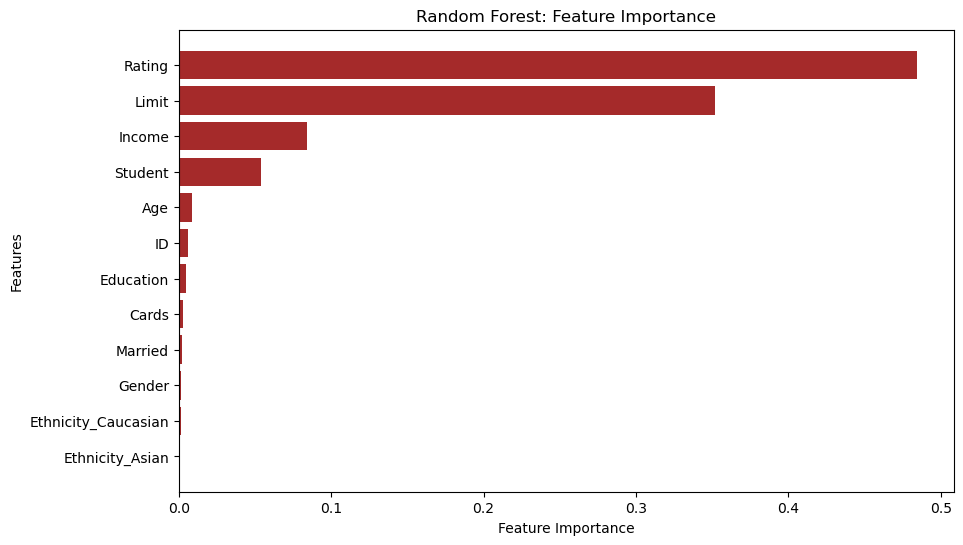

In [502]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    random_state=23,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, rf_model.predict(X_test))
print(f"Test MSE (Random Forest): {mse_rf:.4f}")

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])],
    'Importance': rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest: Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Test MSE (Bagging): 6769.8801


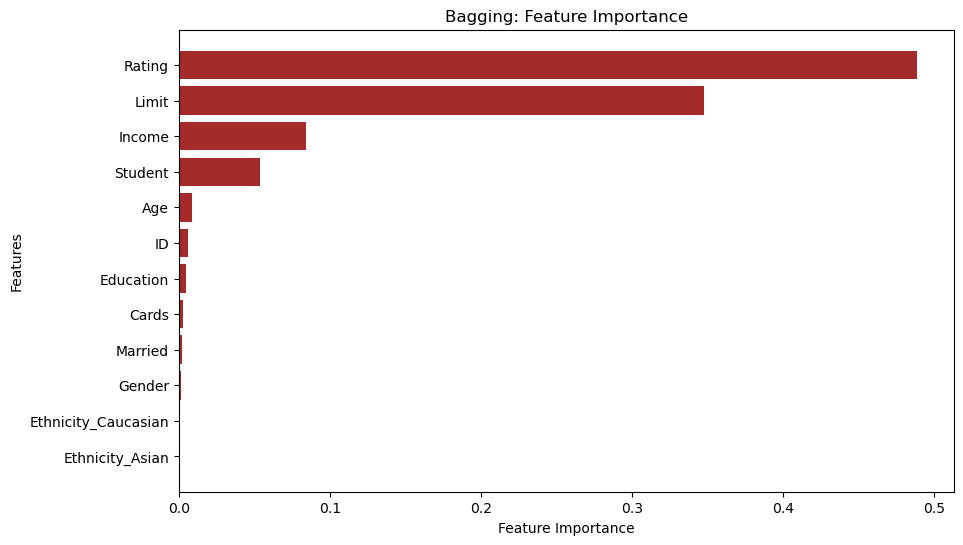

In [503]:
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    bootstrap=True,
    random_state=23,
    n_jobs=-1
)

bagging_model.fit(X_train, y_train)

mse_bagging = mean_squared_error(y_test, bagging_model.predict(X_test))
print(f"Test MSE (Bagging): {mse_bagging:.4f}")

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])],
    'Importance': np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Bagging: Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Test MSE (Boosting): 3704.5737


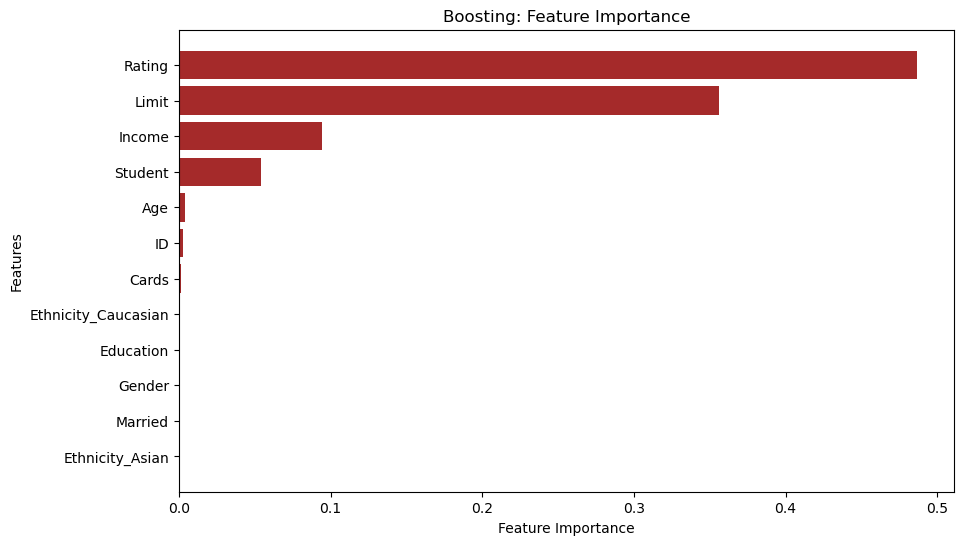

In [504]:
boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=23)
boosting_model.fit(X_train, y_train)

mse_boosting = mean_squared_error(y_test, boosting_model.predict(X_test))
print(f"Test MSE (Boosting): {mse_boosting:.4f}")

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])],
    'Importance': boosting_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Boosting: Feature Importance")
plt.gca().invert_yaxis()
plt.show()